# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

city_count = 0

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

for city in cities:
    
# Build query URL
    query_url = url + "q=" + city + "&units=" + units + "&appid=" + weather_api_key
    weather_response = requests.get(query_url)
    weather_json = weather_response.json() 
  
    try:
        city_count += 1
        city_name.append(weather_json["name"])
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        wind_speed.append(weather_json["wind"]["speed"])          
        print(f"City number {city_count} was found! Appending city {city} to list")
        
    except:
        print(f"City number {city_count} was missing, {city} was not added")
        pass

City number 1 was found! Appending city sitka to list
City number 2 was found! Appending city kaeo to list
City number 3 was found! Appending city albany to list
City number 4 was found! Appending city mataura to list
City number 5 was found! Appending city lompoc to list
City number 6 was found! Appending city busselton to list
City number 7 was missing, taolanaro was not added
City number 8 was found! Appending city dwarka to list
City number 9 was found! Appending city thompson to list
City number 10 was found! Appending city qaanaaq to list
City number 11 was found! Appending city broken hill to list
City number 12 was found! Appending city rikitea to list
City number 13 was found! Appending city yanam to list
City number 14 was found! Appending city port alfred to list
City number 15 was found! Appending city wanaka to list
City number 16 was found! Appending city tuktoyaktuk to list
City number 17 was found! Appending city griffith to list
City number 18 was found! Appending city

City number 143 was found! Appending city hambantota to list
City number 144 was found! Appending city ghanzi to list
City number 145 was missing, tarudant was not added
City number 146 was found! Appending city pryozerne to list
City number 147 was found! Appending city pangnirtung to list
City number 148 was found! Appending city katobu to list
City number 149 was found! Appending city erzin to list
City number 150 was found! Appending city airai to list
City number 151 was found! Appending city luwuk to list
City number 152 was found! Appending city gwanda to list
City number 153 was found! Appending city coquimbo to list
City number 154 was found! Appending city katsuura to list
City number 155 was found! Appending city dickinson to list
City number 156 was missing, marcona was not added
City number 157 was missing, kazalinsk was not added
City number 158 was found! Appending city salalah to list
City number 159 was missing, labutta was not added
City number 160 was found! Appendin

City number 286 was found! Appending city caravelas to list
City number 287 was found! Appending city saskylakh to list
City number 288 was missing, amderma was not added
City number 289 was found! Appending city college to list
City number 290 was found! Appending city naryan-mar to list
City number 291 was found! Appending city ati to list
City number 292 was found! Appending city takoradi to list
City number 293 was missing, yirol was not added
City number 294 was found! Appending city rocha to list
City number 295 was found! Appending city makasar to list
City number 296 was found! Appending city constantine to list
City number 297 was found! Appending city komsomolskiy to list
City number 298 was found! Appending city khatanga to list
City number 299 was found! Appending city san lorenzo to list
City number 300 was missing, ondorhaan was not added
City number 301 was found! Appending city paramonga to list
City number 302 was found! Appending city gat to list
City number 303 was m

City number 426 was found! Appending city kanigiri to list
City number 427 was found! Appending city alyangula to list
City number 428 was found! Appending city arinos to list
City number 429 was found! Appending city hereford to list
City number 430 was found! Appending city tres arroyos to list
City number 431 was found! Appending city clyde river to list
City number 432 was found! Appending city wanning to list
City number 433 was found! Appending city ramsar to list
City number 434 was found! Appending city iisalmi to list
City number 435 was found! Appending city abu dhabi to list
City number 436 was missing, aflu was not added
City number 437 was found! Appending city yar-sale to list
City number 438 was found! Appending city baruun-urt to list
City number 439 was found! Appending city bure to list
City number 440 was found! Appending city okrika to list
City number 441 was found! Appending city bubaque to list
City number 442 was found! Appending city ambulu to list
City number 

City number 566 was found! Appending city codrington to list
City number 567 was found! Appending city kaduna to list
City number 568 was found! Appending city mugur-aksy to list
City number 569 was found! Appending city santiago del estero to list
City number 570 was found! Appending city yining to list
City number 571 was found! Appending city birjand to list
City number 572 was found! Appending city kontagora to list
City number 573 was found! Appending city ponta delgada to list
City number 574 was found! Appending city bulgan to list
City number 575 was found! Appending city padilla to list
City number 576 was found! Appending city podporozhye to list
City number 577 was found! Appending city hobyo to list
City number 578 was missing, gollere was not added
City number 579 was found! Appending city west odessa to list
City number 580 was found! Appending city puerto penasco to list
City number 581 was found! Appending city bandarbeyla to list
City number 582 was found! Appending ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = pd.DataFrame({
    "City Name": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})
df.index.name = "City ID"

df.to_csv("city_weather_df.csv")

df.head()

,City Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Sitka,90,US,1584911524,75,57.05,-135.33,42.8,8.05
1,Kaeo,100,NZ,1584911524,92,-35.10,173.78,66.0,5.99
2,Albany,20,US,1584911284,23,42.60,-73.97,43.0,5.82
3,Mataura,100,NZ,1584911524,89,-46.19,168.86,50.0,3.00
4,Lompoc,90,US,1584911524,59,34.64,-120.46,68.0,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [62]:
date_of_data = datetime.now().strftime("%B %d, %Y")

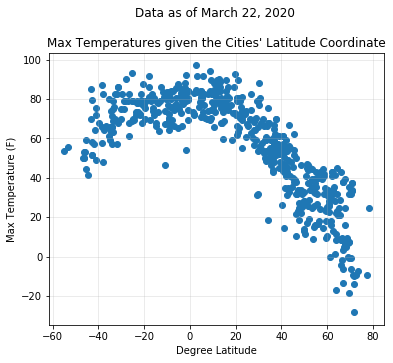

In [64]:
fig = plt.figure(figsize=(6,5))

plt.scatter(df["Lat"], df["Max Temp"])
plt.title(f"Data as of {date_of_data} \n\nMax Temperatures given the Cities' Latitude Coordinate")
plt.xlabel("Degree Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(alpha=0.3)
plt.show()

fig.tight_layout()
fig.savefig("World Max Temperatures.png")

In [ ]:
#The code is taking all cities and plotting today's maximum temperature for each city given the city's Latitude Coordinate.
#The data is analyzing each city's individual maximum temperature given its Latitude Coordinate and combining all data into one scatter plot.

#### Latitude vs. Humidity Plot

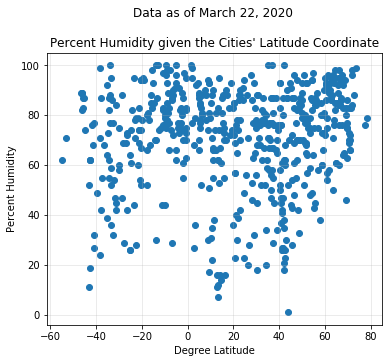

In [65]:
fig = plt.figure(figsize=(6,5))

plt.scatter(df["Lat"], df["Humidity"])
plt.title(f"Data as of {date_of_data} \n\nPercent Humidity given the Cities' Latitude Coordinate")
plt.xlabel("Degree Latitude")
plt.ylabel("Percent Humidity")
plt.grid(alpha=0.3)
plt.show()

fig.tight_layout()
fig.savefig("World Humidity.png")

In [ ]:
#The code is taking all cities and plotting today's percent humidity for each city given the city's Latitude Coordinate.
#The data is analyzing each city's individual percent humidity given its Latitude Coordinate and combining all data into one scatter plot.

#### Latitude vs. Cloudiness Plot

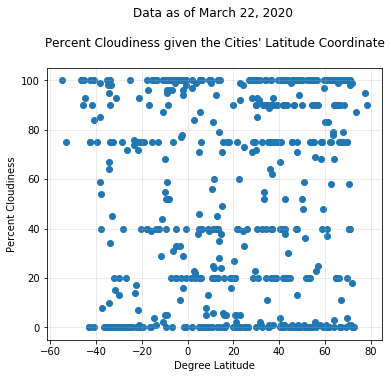

In [66]:
fig = plt.figure(figsize=(6,5))

plt.scatter(df["Lat"], df["Cloudiness"])
plt.title(f"Data as of {date_of_data} \n\nPercent Cloudiness given the Cities' Latitude Coordinate\n")
plt.xlabel("Degree Latitude")
plt.ylabel("Percent Cloudiness")
plt.grid(alpha=0.3)
plt.show()

fig.tight_layout()
fig.savefig("World Cloudiness.png")

In [ ]:
#The code is taking all cities and plotting today's percent cloudiness for each city given the city's Latitude Coordinate.
#The data is analyzing each city's individual percent cloudiness given its Latitude Coordinate and combining all data into one scatter plot.

#### Latitude vs. Wind Speed Plot

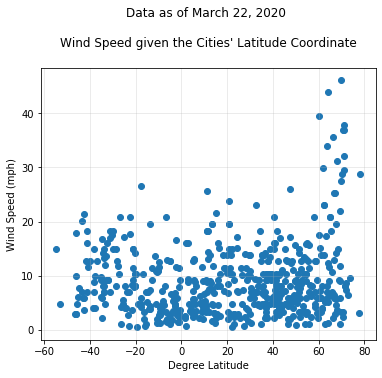

In [67]:
fig = plt.figure(figsize=(6,5))

plt.scatter(df["Lat"], df["Wind Speed"])
plt.title(f"Data as of {date_of_data} \n\nWind Speed given the Cities' Latitude Coordinate\n")
plt.xlabel("Degree Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(alpha=0.3)
plt.show()

fig.tight_layout()
fig.savefig("World Wind Speed.png")

In [ ]:
#The code is taking all cities and plotting today's wind speed for each city given the city's Latitude Coordinate.
#The data is analyzing each city's individual wind speed given its Latitude Coordinate and combining all data into one scatter plot.

## Linear Regression

In [42]:
# Create Northern and Southern Hemisphere DataFrames
df_north = df.loc[df["Lat"] >= 0, :]

df_south = df.loc[df["Lat"] <= 0, :]

df_north.head()

,City Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Sitka,90,US,1584911524,75,57.05,-135.33,42.80,8.05
2,Albany,20,US,1584911284,23,42.60,-73.97,43.00,5.82
4,Lompoc,90,US,1584911524,59,34.64,-120.46,68.00,12.75
6,Dwārka,60,IN,1584911524,86,22.24,68.97,75.79,10.29
7,Thompson,90,CA,1584911521,87,55.74,-97.86,32.00,11.41


In [43]:
lat_north = df_north["Lat"]

lat_south = df_south["Lat"]

In [44]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression_plots(x_axis, y_axis, title, ylabel):
    
    correlation = st.pearsonr(x_axis, y_axis)[0]

    #Linear Regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
    
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regress_values, "r-")
    plt.title(f"Data from {date_of_data} \n\n{title} vs Latitude Linear Regression \n\n            Linear Regression Equation: {line_eq}\
              \n\nStatistics: \nrvalue = {round(correlation, 2)} \nr-squared = {round(correlation**2, 2)}")
    plt.xlabel("Degree Latitude")
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3)
    plt.show()
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

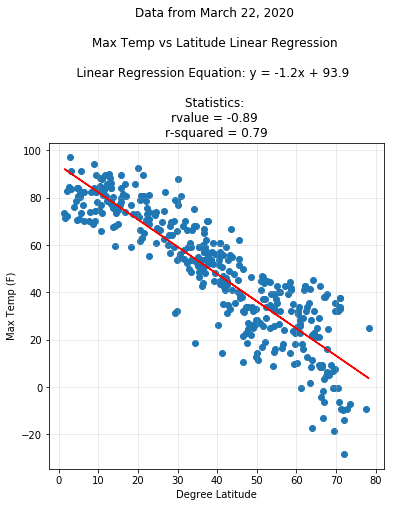

In [45]:
fig = plt.figure(figsize=(6,6))
regression_plots(lat_north, df_north["Max Temp"], "Max Temp", "Max Temp (F)")
fig.tight_layout()
fig.savefig("Max Temp Northern Hemisphere.png")

In [ ]:
#This linear regression is modelling how correlated the temperatures are vs how far north you travel from the equator.
#There seems to be a fairly strong correlation between max temp and latitude: the higher latitude you go, the lower the temperature is.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

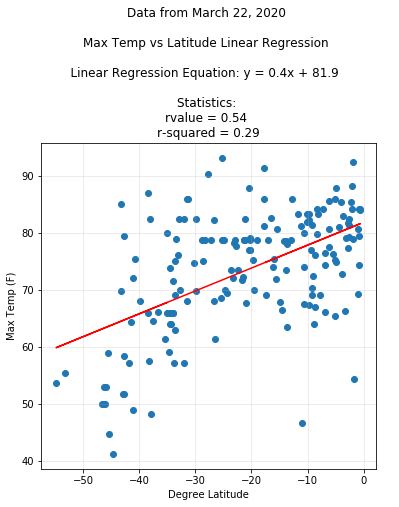

In [46]:
fig = plt.figure(figsize=(6,6))
regression_plots(lat_south, df_south["Max Temp"], "Max Temp", "Max Temp (F)")
fig.tight_layout()
fig.savefig("Max Temp Southern Hemisphere.png")

In [ ]:
#This linear regression is modelling how correlated the temperatures are vs how far south you travel from the equator.
#There seems to be a fairly close correlation between max temp and latitude: the lower latitude you go (more south you travel), the lower the temperature is.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

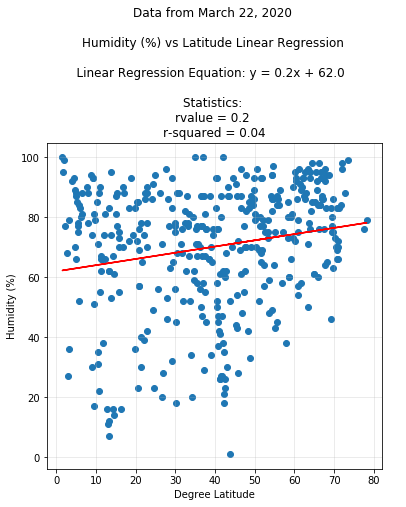

In [47]:
fig = plt.figure(figsize=(6,6))
regression_plots(lat_north, df_north["Humidity"], "Humidity (%)", "Humidity (%)")
fig.tight_layout()
fig.savefig("Humidity (%) Northern Hemisphere.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

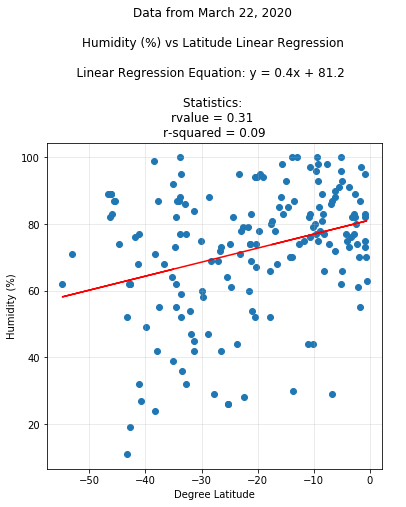

In [48]:
fig = plt.figure(figsize=(6,6))
regression_plots(lat_south, df_south["Humidity"], "Humidity (%)", "Humidity (%)")
fig.tight_layout()
fig.savefig("Humidity (%) Southern Hemisphere.png")

In [ ]:
#The linear regression for the humidity scatter plots are modelling the correlation between how far away from the equator a city is and how much humidity is present per city.
#In these two scatter plots, the regression lines are both telling us that as of today, the humidity is increasing globally for how far north the city is.
#In the southern hemisphere, the closer to the equator the city is, the higher the relative humidity is, and in the northern hemisphere, the further north the city is, the higher the relative humidity.
# Globally, today's humidity seems to be increasing the more north the city is (regardless of northern or southern hemisphere).

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

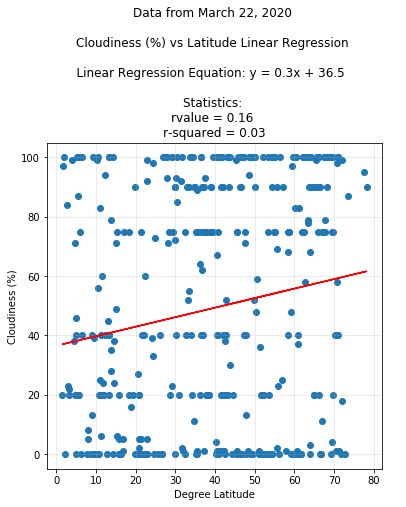

In [49]:
fig = plt.figure(figsize=(6,6))
regression_plots(lat_north, df_north["Cloudiness"], "Cloudiness (%)", "Cloudiness (%)")
fig.tight_layout()
fig.savefig("Cloudiness (%) Northern Hemisphere.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

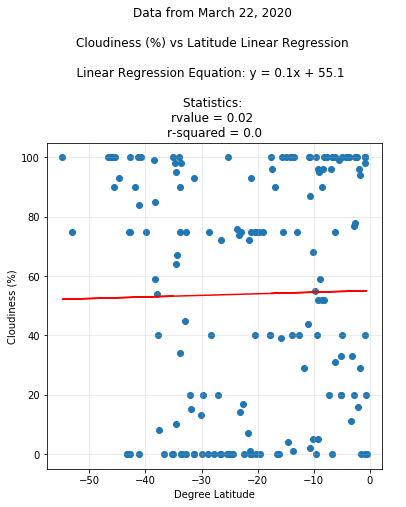

In [50]:
fig = plt.figure(figsize=(6,6))
regression_plots(lat_south, df_south["Cloudiness"], "Cloudiness (%)", "Cloudiness (%)")
fig.tight_layout()
fig.savefig("Cloudiness (%) Southern Hemisphere.png")

In [ ]:
#The linear regression for the two Cloudiness scatter plots are measuring the correlations between distance from equator and % cloudiness.
#In these two scatter plots, the linear regression is telling us that the southern hemisphere is experiencing cloudiness with very little differentiation bewteen living more south or more north.
#The same cannot be said for the Northern hemisphere. It seems there is a much higher relationship between how far north the city is and how much cloudiness is being observed.
#Even though the data being analyzed tells us that the northern hemisphere is experiencing more cloudiness the further north the city is, there is a fairly low overall correlation, meaning the cloudiness is spread out fairly evenly between both northern and southern hemispheres.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

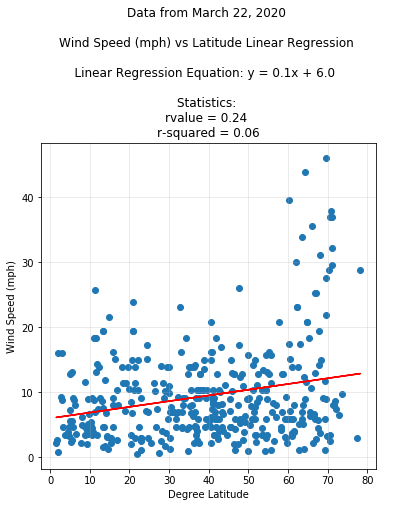

In [51]:
fig = plt.figure(figsize=(6,6))
regression_plots(lat_north, df_north["Wind Speed"], "Wind Speed (mph)", "Wind Speed (mph)")
fig.tight_layout()
fig.savefig("Wind Speed (mph) Northern Hemisphere.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

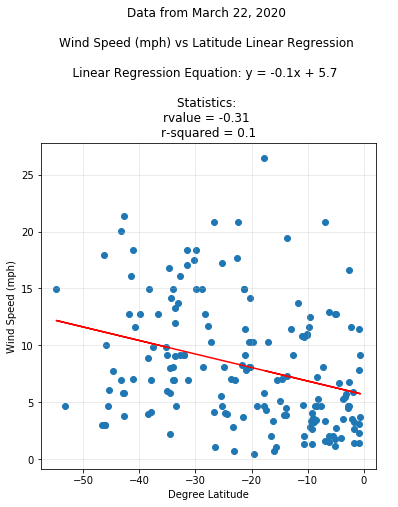

In [52]:
fig = plt.figure(figsize=(6,6))
regression_plots(lat_south, df_south["Wind Speed"], "Wind Speed (mph)", "Wind Speed (mph)")
fig.tight_layout()
fig.savefig("Wind Speed (mph) Southern Hemisphere.png")

In [ ]:
#The linear regressions for the two wind speed scatter plots are measuring the correlation between how far north or south the city is vs how windy the city is.
#These regressions are more telling, with the southern hemisphere having more wind the further south the city is, and the northern hemisphere having more wind the further north the city is
#Overall, we can conclude that the further away the city is from the equator, the higher the general wind speed.